In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

# Check contents of train and test directories
print("Train folder contents:", os.listdir(r'C:\Users\Mani\OneDrive - akhonzada solution\Desktop\Pratice\New folder\RealTimeObjectDetection\Tensorflow\workspace\images\train'))


Train folder contents: ['Hello', 'I Love You', 'No', 'Thanks', 'Yes']


In [3]:
# Paths to dataset
train_path = r'C:\Users\Mani\OneDrive - akhonzada solution\Desktop\Pratice\New folder\RealTimeObjectDetection\Tensorflow\workspace\images\train'

test_path = r'C:\Users\Mani\OneDrive - akhonzada solution\Desktop\Pratice\New folder\RealTimeObjectDetection\Tensorflow\workspace\images\test'

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 47 images belonging to 5 classes.
Found 20 images belonging to 5 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size
img_size = (64, 64)
batch_size = 16

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_data = train_datagen.flow_from_directory(
    r'C:\Users\Mani\OneDrive - akhonzada solution\Desktop\Pratice\New folder\RealTimeObjectDetection\Tensorflow\workspace\images\train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    r'C:\Users\Mani\OneDrive - akhonzada solution\Desktop\Pratice\New folder\RealTimeObjectDetection\Tensorflow\workspace\images\test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load MobileNetV2 base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# Add custom layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 gesture classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, epochs=20, validation_data=test_data)

# Save model in .keras format
model.save("gesture_model.keras")


Found 47 images belonging to 5 classes.
Found 20 images belonging to 5 classes.


C:\Users\Mani\AppData\Local\Temp\ipykernel_6376\4289489709.py:38: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(
C:\Users\Mani\.conda\envs\tfod310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.2303 - loss: 1.9891 - val_accuracy: 0.2500 - val_loss: 1.7615
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.1021 - loss: 1.9909 - val_accuracy: 0.3500 - val_loss: 1.5977
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.3155 - loss: 1.5617 - val_accuracy: 0.4500 - val_loss: 1.3526
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.2859 - loss: 1.6458 - val_accuracy: 0.5500 - val_loss: 1.2356
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.4925 - loss: 1.3955 - val_accuracy: 0.6500 - val_loss: 1.1865
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.4030 - loss: 1.3375 - val_accuracy: 0.6000 - val_loss: 1.1795
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.4696 - loss: 1.2336 - val_accuracy: 0.6000 - val_loss: 1.1297
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - accuracy: 0.3477 - loss: 1.3397 - val_accuracy: 0.6000 - val_loss: 1

In [9]:
# Load the trained model
model = tf.keras.models.load_model("gesture_model.h5")

# Class labels
classes = ['Hello', 'I Love You', 'No', 'Thanks', 'Yes']

# Start webcam for real-time testing
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Define region of interest (ROI)
    roi = frame[100:300, 100:300]
    roi_resized = cv2.resize(roi, (64, 64))
    roi_normalized = roi_resized / 255.0
    roi_input = np.expand_dims(roi_normalized, axis=0)

    # Prediction
    prediction = model.predict(roi_input)
    class_index = np.argmax(prediction)
    gesture_name = classes[class_index]

    # Display result
    cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 2)
    cv2.putText(frame, gesture_name, (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
    cv2.imshow("Hand Gesture Recognition", frame)

    # Quit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107m

KeyboardInterrupt: 

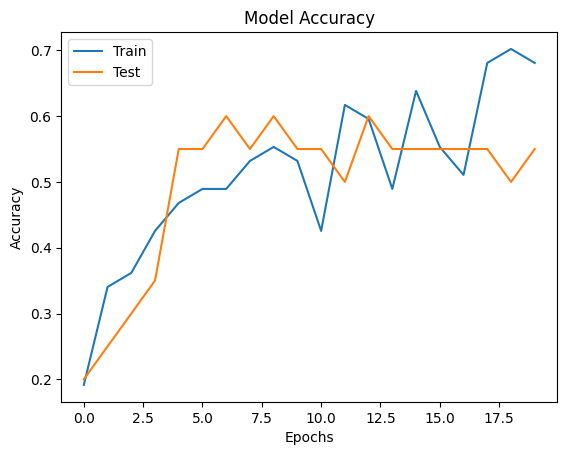

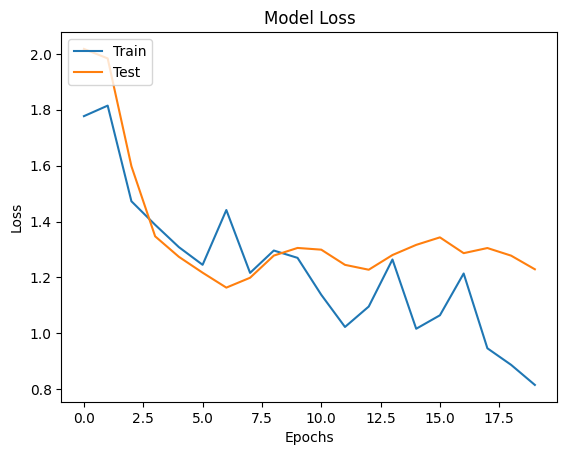

In [10]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
